In [44]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [45]:
import tensorflow as tf

In [46]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        width_shift_range=0.3,
                                        height_shift_range=0.3)
x_train = train_datagen.flow_from_directory(
        'dataset/train',
        target_size = (64,64),
        # color_mode="grayscale",
        batch_size=4,
        class_mode='binary'
        )

Found 478 images belonging to 2 classes.


In [47]:
test_datagen = ImageDataGenerator(rescale=1./255)
x_test = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(64,64),
        batch_size=4,
        # color_mode="grayscale",
        class_mode='binary')

Found 148 images belonging to 2 classes.


In [48]:
vgg = tf.keras.applications.ResNet50(
    include_top=False,
    weights=None,
    input_tensor=None,
    input_shape=(256,256,3),
    pooling=max
)

In [49]:
for layer in vgg.layers:
  layer.trainable = False

In [50]:
adam_optimizer = tf.keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

c:\Users\Admin\anaconda3\envs\tf-gpu\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [51]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_acc', factor=0.3, patience=2, verbose=0, mode='auto', min_delta=0.0001, cooldown=0, min_lr=0.00001)

In [52]:
x = tf.keras.layers.BatchNormalization()(vgg.output)
x = tf.keras.layers.GlobalMaxPooling2D()(x)
x = tf.keras.layers.Dropout(0.5)(x)
prediction = tf.keras.layers.Dense(1, activation='sigmoid')(x)

# # create a model object
model = tf.keras.models.Model(inputs=vgg.input, outputs=prediction)

# # view the structure of the model
model.summary()

# # tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=adam_optimizer,
  metrics=['accuracy']
)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [53]:
history = model.fit(
  x_train,
  validation_data=x_test,
  epochs=10,
  callbacks = [learning_rate_reduction]
)

Epoch 1/10
120/120 [==============================] - 17s 96ms/step - loss: 0.7575 - accuracy: 0.5000 - val_loss: 0.6836 - val_accuracy: 0.6824
Epoch 2/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7728 - accuracy: 0.5795 - val_loss: 0.6936 - val_accuracy: 0.5203
Epoch 3/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7485 - accuracy: 0.5146 - val_loss: 0.7203 - val_accuracy: 0.3176
Epoch 4/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7579 - accuracy: 0.5146 - val_loss: 0.7000 - val_accuracy: 0.4392
Epoch 5/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7589 - accuracy: 0.5126 - val_loss: 0.6889 - val_accuracy: 0.5541
Epoch 6/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7186 - accuracy: 0.5460 - val_loss: 0.7651 - val_accuracy: 0.3108
Epoch 7/10
120/120 [==============================] - 10s 86ms/step - loss: 0.7135 - accuracy: 0.5418 - val_loss: 0.7450 - val_accuracy:

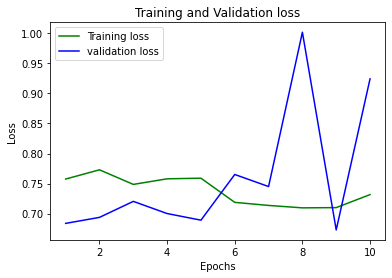

In [54]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

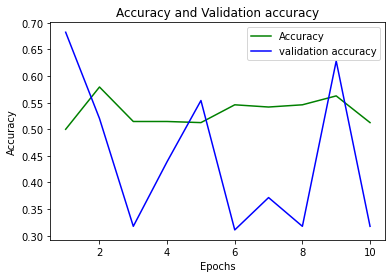

In [55]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'g', label='Accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Accuracy and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()